In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

2023-10-12 14:07:14.002706: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
tf.__version__

'2.12.0'

In [8]:
# Listing 3.1 Loading the IMDB dataset

from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [9]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [10]:
train_labels[0]

1

In [11]:
max([max(sequence) for sequence in train_data])

9999

In [12]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [13]:
# Listing 3.2 Encoding the integer sequences into a binary matrix

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [14]:
print(x_train[1][:10])

[0. 1. 1. 0. 1. 1. 1. 1. 1. 1.]


In [15]:
# Listing 3.3 The model definition

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


2023-10-12 14:07:43.898627: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [16]:
# Listing 3.4 Compiling the model

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])


In [17]:
# Listing 3.5 Configuring the optimizer

from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])


/home/earvin/anaconda3/envs/tf/lib/python3.11/site-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [18]:
# Listing 3.6 Using custom losses and metrics

from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])


In [19]:
# Listing 3.7 Setting aside a validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [20]:
# Listing 3.8 Training your model

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 24s 311ms/step - loss: 0.5378 - acc: 0.7863 - val_loss: 0.4158 - val_acc: 0.8560
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3407 - acc: 0.8891 - val_loss: 0.3277 - val_acc: 0.8784
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2588 - acc: 0.9130 - val_loss: 0.2905 - val_acc: 0.8871
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2101 - acc: 0.9329 - val_loss: 0.2800 - val_acc: 0.8882
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1760 - acc: 0.9436 - val_loss: 0.2743 - val_acc: 0.8905
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1531 - acc: 0.9516 - val_loss: 0.2898 - val_acc: 0.8844
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1309 - acc: 0.9585 - val_loss: 0.3086 - val_acc: 0.8797
Epoch 8/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1159 -

In [21]:
history_dict = history.history
history_dict.keys()
# [u'acc', u'loss', u'val_acc', u'val_loss']

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

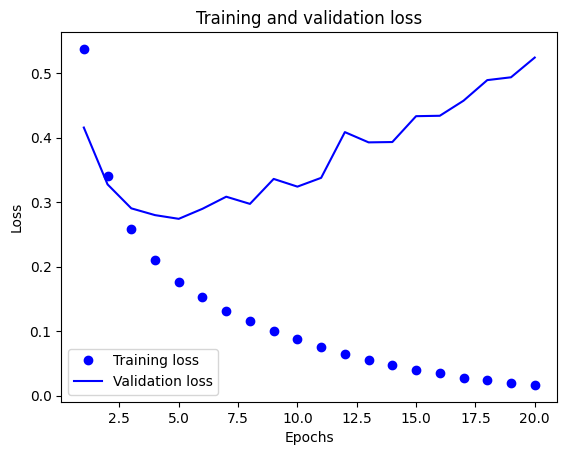

In [22]:
# Listing 3.9 Plotting the training and validation loss

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
#epochs = range(1, len(acc) + 1)
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


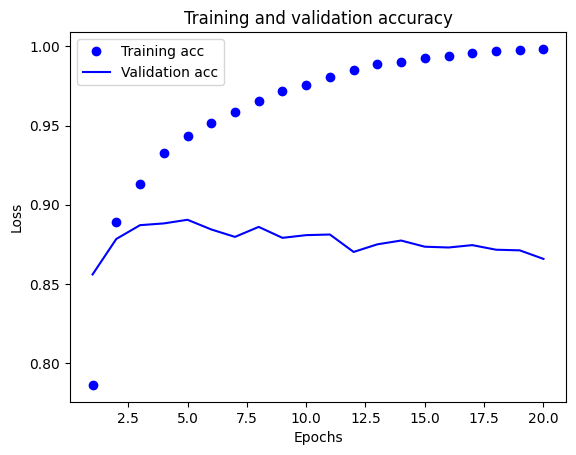

In [23]:
# Listing 3.10 Plotting the training and validation accuracy

plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Listing 3.11 Retraining a model from scratch

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

In [ ]:
results

In [ ]:
model.predict(x_test)

In [6]:
# 3.5 新聞分類：多分類問題
# §代碼清單 3-12

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2113536/2110848 [==============================] - 0s 0us/step


/home/earvin/anaconda3/envs/tf2/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/earvin/anaconda3/envs/tf2/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [7]:
# === FOR CHECK ===
print('train records : ', len(train_data))
print('test  records : ', len(test_data))
print('\n')
print('train_data[10] :')
print(train_data[10])

train records :  8982
test  records :  2246


train_data[10] :
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [8]:
# §代碼清單 3-13 將索引解碼為新聞文本

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[10]])

print(decoded_newswire)

557056/550378 [==============================] - 0s 0us/step
? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3


In [9]:
print(train_labels[10])

3


In [10]:
# §代碼清單 3-14 數據編碼

import numpy as np

def vectorize_sequences(sequences, dimension = 10000) :
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences) :
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
# §代碼清單 3-14 數據編碼 continue ...

def to_one_hot(labels, dimension = 46) :
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels) :
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

# built-in metho in keras
#from keras.utils.np_utils import to_categorical
#one_hot_train_labels = to_categorical(train_labels)
#one_hot_test_labels = to_categorical(test_labels)



In [12]:
# §代碼清單 3-15 模型定義

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))


2023-09-08 10:15:02.079851: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-09-08 10:15:02.097923: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-09-08 10:15:02.108258: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-09-08 10:15:02.109659: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (VMDebianVIVO): /proc/driver/nvidia/version does not exist
2023-09-08 10:15:02.156830: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild Tens

In [13]:
# §代碼清單 3-16 編譯模型

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])


In [14]:
# §代碼清單 3-17 留出驗證集

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [15]:
# §代碼清單 3-18 訓練模型

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))


2023-09-08 10:15:23.693654: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 319280000 exceeds 10% of free system memory.
2023-09-08 10:15:30.697713: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-09-08 10:15:30.761129: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1992000000 Hz


Epoch 1/20


2023-09-08 10:15:32.448700: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 20480000 exceeds 10% of free system memory.


 3/16 [====>.........................] - ETA: 1s - loss: 3.7183 - accuracy: 0.1584

2023-09-08 10:15:32.766213: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 20480000 exceeds 10% of free system memory.
2023-09-08 10:15:32.878110: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 20480000 exceeds 10% of free system memory.
2023-09-08 10:15:32.959780: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 20480000 exceeds 10% of free system memory.


16/16 [==============================] - 4s 179ms/step - loss: 3.0712 - accuracy: 0.3994 - val_loss: 1.7095 - val_accuracy: 0.6560
Epoch 2/20
16/16 [==============================] - 3s 165ms/step - loss: 1.4677 - accuracy: 0.7053 - val_loss: 1.2886 - val_accuracy: 0.7340
Epoch 3/20
16/16 [==============================] - 3s 168ms/step - loss: 1.0502 - accuracy: 0.7772 - val_loss: 1.1222 - val_accuracy: 0.7520
Epoch 4/20
16/16 [==============================] - 2s 143ms/step - loss: 0.8339 - accuracy: 0.8187 - val_loss: 1.0187 - val_accuracy: 0.7830
Epoch 5/20
16/16 [==============================] - 2s 111ms/step - loss: 0.6464 - accuracy: 0.8581 - val_loss: 0.9960 - val_accuracy: 0.7710
Epoch 6/20
16/16 [==============================] - 3s 224ms/step - loss: 0.5341 - accuracy: 0.8836 - val_loss: 0.9194 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 3s 212ms/step - loss: 0.4110 - accuracy: 0.9138 - val_loss: 0.8981 - val_accuracy: 0.8050
Epoch 8/20
16/16 

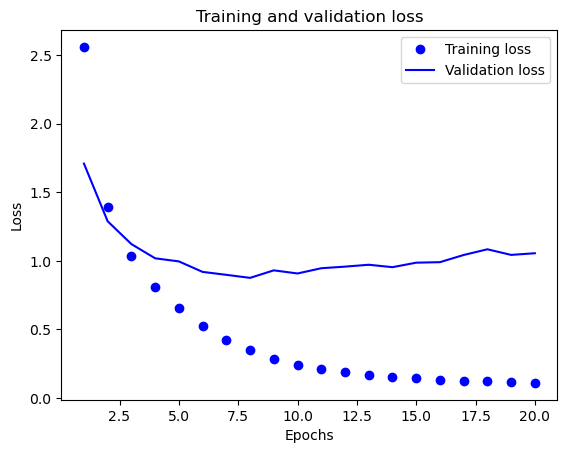

In [17]:
# §代碼清單 3-19 繪製訓練損失和驗證損失

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


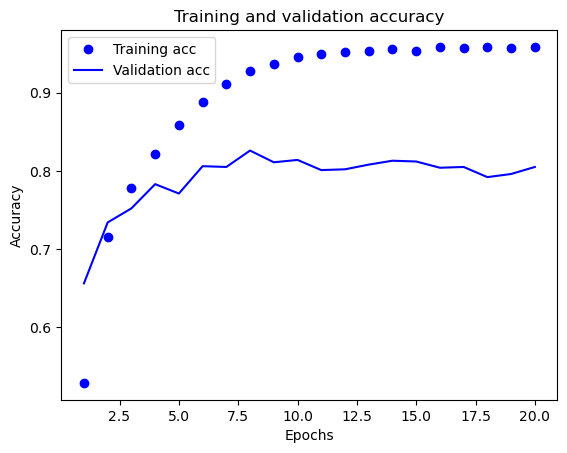

In [18]:
# §代碼清單 3-20 繪製訓練精度和驗證精度

plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [19]:
# §代碼清單 3-21 從頭開始重新訓練一個模型

model = models.Sequential()
model = models.Sequential()

model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs = 9,
         batch_size = 512,
         validation_data = (x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 3s 133ms/step - loss: 3.0544 - accuracy: 0.4347 - val_loss: 1.6807 - val_accuracy: 0.6520
Epoch 2/9
16/16 [==============================] - 2s 117ms/step - loss: 1.4885 - accuracy: 0.6929 - val_loss: 1.3065 - val_accuracy: 0.7180
Epoch 3/9
16/16 [==============================] - 2s 113ms/step - loss: 1.1162 - accuracy: 0.7632 - val_loss: 1.1598 - val_accuracy: 0.7520
Epoch 4/9
16/16 [==============================] - 2s 105ms/step - loss: 0.8557 - accuracy: 0.8238 - val_loss: 1.0582 - val_accuracy: 0.7730
Epoch 5/9
16/16 [==============================] - 2s 115ms/step - loss: 0.6798 - accuracy: 0.8585 - val_loss: 0.9871 - val_accuracy: 0.8000
Epoch 6/9
16/16 [==============================] - 2s 121ms/step - loss: 0.5415 - accuracy: 0.8878 - val_loss: 0.9667 - val_accuracy: 0.8030
Epoch 7/9
16/16 [==============================] - 2s 141ms/step - loss: 0.4417 - accuracy: 0.9123 - val_loss: 0.9757 - val_accuracy: 0.7940
Epoch 8/9
16/

In [20]:
# === FOR CHECK (p.64, pdf.81) ===
print(results)

[1.0024073123931885, 0.7791629433631897]


In [21]:
# §代碼清單 3-22 在新數據上生成預測結果

predictions = model.predict(x_test)

#print(predictions[0].shape)
#print(np.argmax(predictions[0]))

#y_train = np.array(train_labels)
#y_test = np.array(test_labels)

#model.compile(optimizer = 'rmsprop',
#             loss = 'sparse_categorical_crossentropy',
#             metric = ['accuracy'])



In [22]:
# §代碼清單 3-23 具有信息瓶頸的模型

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(4, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs = 20,
         batch_size = 128,
         validation_data = (x_val, y_val))


Epoch 1/20
63/63 [==============================] - 4s 48ms/step - loss: 3.3192 - accuracy: 0.1389 - val_loss: 2.2893 - val_accuracy: 0.4340
Epoch 2/20
63/63 [==============================] - 3s 46ms/step - loss: 2.0113 - accuracy: 0.4711 - val_loss: 1.6323 - val_accuracy: 0.6200
Epoch 3/20
63/63 [==============================] - 3s 51ms/step - loss: 1.3662 - accuracy: 0.6772 - val_loss: 1.3882 - val_accuracy: 0.6680
Epoch 4/20
63/63 [==============================] - 3s 47ms/step - loss: 1.1039 - accuracy: 0.7340 - val_loss: 1.3228 - val_accuracy: 0.6940
Epoch 5/20
63/63 [==============================] - 3s 50ms/step - loss: 1.0221 - accuracy: 0.7561 - val_loss: 1.3103 - val_accuracy: 0.7060
Epoch 6/20
63/63 [==============================] - 3s 45ms/step - loss: 0.8873 - accuracy: 0.7778 - val_loss: 1.3040 - val_accuracy: 0.7040
Epoch 7/20
63/63 [==============================] - 3s 46ms/step - loss: 0.8250 - accuracy: 0.7865 - val_loss: 1.3178 - val_accuracy: 0.7130
Epoch 8/20
63

In [ ]:
# === FOR CHECK (p.64, pdf.81) ===

results = model.evaluate(x_test, one_hot_test_labels)
print(results)
